# Import Statements

In [21]:
import re
import sklearn
import pandas as pd
import gensim
import numpy as np
import nltk
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
from gensim import corpora, models
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation as LDA
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import TruncatedSVD, NMF
from sklearn.metrics import classification_report
from simpletransformers.classification import ClassificationModel, ClassificationArgs
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

# Data Preperation (Topic)

In [2]:
# Importing all related Datasets, cleaning, pre-processing and creating a balanced dataset 
# We know that our dataset is balanced across 3 categories of sports, movie and books
# So each category will be assigned 1/3 of the dataset...

fifa_df = pd.read_csv('fifa.csv')
fifa_df.dropna(inplace=True)
fifa_df = fifa_df.drop(['Unnamed: 0', 'Date Created', 'Number of Likes', 'Source of Tweet', 'Sentiment'],axis = 1)
fifa_df.rename(columns={'Tweet':'text'}, inplace=True)
fifa_df['topic'] = 'sports'
fifa = fifa_df.sample(n=1000, random_state=1)

In [3]:
fifa

,text,topic
21402,a fan chant jsjzhdhd #Dreamers2022 #WorldCup20...,sports
3075,Argentina since day 1🇦🇷🤍💙 \n#worldcup2022 #leo...,sports
1428,"It is not a political message, it is our count...",sports
4286,Fuck Boudiaf! \n@EnnerValencia14 is is inviola...,sports
12262,Turning 30 and Unmarried Felt Like I Underachi...,sports
...,...,...
3094,@JohnMcMah0n Thanks for your #WorldCup2022 #Re...,sports
19,@ALosersLament @Majstar7 @piersmorgan racist u...,sports
10012,Plot Twist: The refs were the ones really paid...,sports
2220,The Ministry announces facilities to attract f...,sports


In [4]:
nba = pd.read_csv('NBA.csv')
nba.dropna(inplace=True)
nba = nba[['text']]
nba['topic'] = 'sports'
nba = nba.sample(n=1000, random_state=1)

In [5]:
nba

,text,topic
4546,it's a wrap! #DenverNuggets #NBAWesternFinals,sports
5860,#BostonCeltics need to stop playing son I’m ge...,sports
13820,"Great season, ain’t no complaints #HEATCulture...",sports
16767,🔥 Tyler Herro Debut RC LOT 🔥 Bid @ $16.50 👀📈📈📈...,sports
3679,"Vibe Czech 1, 2... Buena Vibras coming soon......",sports
...,...,...
7286,"Igoudala has passed up 2 chances now, he had t...",sports
15208,I'm I'm I'm gonna keep it together but but wha...,sports
16945,On to the Next 💪🏾🏀 #miamiheat https://t.co/r2w...,sports
18499,Iggy Iggy can’t you see... Sometimes your mo...,sports


In [6]:
nfl = pd.read_csv('NFL.csv')
nfl.dropna(inplace=True)
nfl = nfl[['text']]
nfl['topic'] = 'sports'
nfl = nfl.sample(n=1000, random_state=1)

In [7]:
nfl

,text,topic
13830,Yeah if we had picked Fulton instead Id be thr...,sports
18025,So you would rather have Troy Dye? Hall couldv...,sports
69758,KJ please and this is an A draft,sports
84305,Yall got anymore of them LBs? Giants,sports
21698,For real. If we get 2 or 3 long starters thats...,sports
...,...,...
94383,Every GM in the league would take 78 2nd round...,sports
69898,I really want every WR we picked in this draft...,sports
88073,You are not wrong and I totally agree with you...,sports
23047,Considering how rare it is for a team with an ...,sports


Total number of sport related text is 3000, so we need 3000 for movie and 3000 for books...

In [8]:
movies_df = pd.read_csv('Movies3.csv')
movies_df = movies_df[['text']]
movies_df.dropna(inplace=True)
movies_df['topic'] = 'movie'
movies = movies_df.sample(n=3000, random_state=1)

In [9]:
movies

,text,topic
98387,They were huge with my skater group in the lat...,movie
1156777,What the heck Weren t Jackie Chan Bruce Lee ...,movie
570010,Thief 1981 To Live and Die in LA 1985,movie
451819,Live action the Imam from the Riddick movies ...,movie
954418,Isn t it great It s in my top three of Altman s,movie
...,...,...
325355,Hey Mr Balfe first of all a big giant thank y...,movie
568285,Map of Tiny Perfect Things is my favorite Rea...,movie
1490155,Meh They are rich and insured They ll be fin...,movie
2279316,shrek from the movie shrek also rowley from t...,movie


In [10]:
books_df = pd.read_csv('Books_rating.csv')
books_df.dropna(inplace=True)
books_df = books_df[['review/text']]
books_df.rename(columns={'review/text': 'text'}, inplace=True)
books_df['topic'] = 'book'
books = books_df.sample(n=3000, random_state=1)

In [11]:
books

,text,topic
1898915,"This is an great topical reference, I use it q...",book
286070,I re-read this book every year at the start of...,book
885833,I don't know how I stumbled on this book but I...,book
2075898,I was very disappointed in this book. The plot...,book
2821735,Beautiufl coloring book. I bought these for my...,book
...,...,...
1694666,This book was a joy to read! It shows how rewa...,book
2957488,While I'm sure wrestling fans will be enthrall...,book
2133252,My book arrived in perfect shape and in a spee...,book
131723,"Christopher Phillips, in the true tradition es...",book


In [12]:
# Concatenating all the df's into one...
df = pd.concat([fifa,movies,nba,nfl,books], ignore_index=True)

In [13]:
df

,text,topic
0,a fan chant jsjzhdhd #Dreamers2022 #WorldCup20...,sports
1,Argentina since day 1🇦🇷🤍💙 \n#worldcup2022 #leo...,sports
2,"It is not a political message, it is our count...",sports
3,Fuck Boudiaf! \n@EnnerValencia14 is is inviola...,sports
4,Turning 30 and Unmarried Felt Like I Underachi...,sports
...,...,...
8995,This book was a joy to read! It shows how rewa...,book
8996,While I'm sure wrestling fans will be enthrall...,book
8997,My book arrived in perfect shape and in a spee...,book
8998,"Christopher Phillips, in the true tradition es...",book


# LDA via Gensim Implementation (Topic)

In [14]:
lemmatizer = WordNetLemmatizer()
def lemmatize_stemming(text):
    return lemmatizer.lemmatize(text)
def preprocess(text):
    result = []
    for token in gensim.utils.simple_preprocess(text):
        if token not in gensim.parsing.preprocessing.STOPWORDS and len(token) > 3:
           # result.append(token)
            result.append(lemmatize_stemming(token))
    return result
    
data_text = df[['text']]
data_text['index'] = data_text.index
documents = data_text
processed_docs = documents['text'].map(preprocess)
dictionary = gensim.corpora.Dictionary(processed_docs)

dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]

tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]


lda_model = gensim.models.LdaMulticore(bow_corpus, num_topics=3, id2word=dictionary, passes=2, workers=2)
data_text['processed_text'] = data_text['text'].map(preprocess)
lda_model_tfidf = gensim.models.LdaMulticore(corpus_tfidf, num_topics=3, id2word=dictionary, passes=2, workers=4)


In [15]:
df_test = pd.read_csv('sentiment-topic-test.tsv', sep='\t')

In [16]:
for i in df_test['text']:
    bow_vector = dictionary.doc2bow(preprocess(i))
    for index, score in sorted(lda_model[bow_vector], key=lambda tup: -1*tup[1]):
        print("Score: {}\t Topic_id {}\t Topic: {}".format(score, index, lda_model_tfidf.print_topic(index, 5)))
        df_test['Predicted_Topic_LDA'] = index

Score: 0.8514882922172546	 Topic_id 2	 Topic: 0.011*"book" + 0.009*"worldcup" + 0.006*"http" + 0.006*"miamiheat" + 0.006*"movie"
Score: 0.07469693571329117	 Topic_id 1	 Topic: 0.012*"http" + 0.010*"worldcup" + 0.009*"miamiheat" + 0.007*"book" + 0.006*"movie"
Score: 0.07381477952003479	 Topic_id 0	 Topic: 0.011*"book" + 0.008*"worldcup" + 0.007*"like" + 0.005*"time" + 0.005*"miamiheat"
Score: 0.7457103729248047	 Topic_id 2	 Topic: 0.011*"book" + 0.009*"worldcup" + 0.006*"http" + 0.006*"miamiheat" + 0.006*"movie"
Score: 0.19469110667705536	 Topic_id 0	 Topic: 0.011*"book" + 0.008*"worldcup" + 0.007*"like" + 0.005*"time" + 0.005*"miamiheat"
Score: 0.059598539024591446	 Topic_id 1	 Topic: 0.012*"http" + 0.010*"worldcup" + 0.009*"miamiheat" + 0.007*"book" + 0.006*"movie"
Score: 0.8633279800415039	 Topic_id 1	 Topic: 0.012*"http" + 0.010*"worldcup" + 0.009*"miamiheat" + 0.007*"book" + 0.006*"movie"
Score: 0.07260708510875702	 Topic_id 2	 Topic: 0.011*"book" + 0.009*"worldcup" + 0.006*"http" 

In [17]:
df_test

,sentence id,text,sentiment,topic,Predicted_Topic_LDA
0,0,I wouldn't be caught dead watching the NFL if ...,negative,sports,1
1,1,Chris O'Donnell stated that while filming for ...,neutral,movie,1
2,2,"The whole game was a rollercoaster ride, but L...",positive,sports,1
3,3,"Zendaya slayed in Dune 2, as she does in all h...",positive,movie,1
4,4,While my favorite player was playing this matc...,negative,sports,1
5,5,My uncle's brother's neighbor's cat's veterina...,neutral,book,1
6,6,He said that The Great Gatsby is the best nove...,negative,book,1
7,7,I could not look away from this train wrck of ...,negative,movie,1
8,8,The film Everything Everywhere All At Once fol...,neutral,movie,1
9,9,I just finished reading pride and prejudice wh...,positive,book,1


# LDA (Topic)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Precision5570\AppData\Local\Temp\ipykernel_14676\4042924629.py:2: SyntaxWarning: invalid escape sequence '\.'
  papers['paper_text_processed'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))


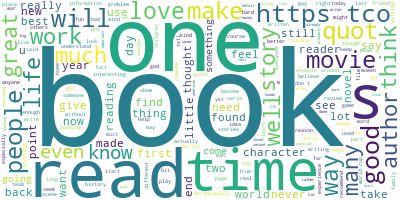

In [18]:
papers = df
papers['paper_text_processed'] = papers['text'].map(lambda x: re.sub('[,\.!?]', '', x))

papers['paper_text_processed'] = papers['paper_text_processed'].map(lambda x: x.lower())


# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=1000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [23]:
def print_topics(model, count_vectorizer, n_top_words):
    words = count_vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print("\nTopic #%d:" % topic_idx)
        print(" ".join([words[i]
                        for i in topic.argsort()[:-n_top_words - 1:-1]]))
        
# Tweak the two parameters below (use int values below 15)
number_topics = 3
number_words = 10
count_vectorizer = CountVectorizer(stop_words='english')
count_data = count_vectorizer.fit_transform(papers['paper_text_processed'])
# Create and fit the LDA model
lda = LDA(n_components=number_topics)
lda.fit(count_data)

# Print the topics found by the LDA model
print("Topics found via LDA:")
print_topics(lda, count_vectorizer, number_words)

Topics found via LDA:

Topic #0:
book quot like read just people movie great good love

Topic #1:
https tco worldcup2022 miamiheat nba world lakers game qatar nbafinals

Topic #2:
book read like good just time story great really books


In [24]:
test_data = []
for i in df_test['text']:
    test_data.append(i)
    
transformed_test_data= count_vectorizer.transform(test_data)
for i, row in enumerate(transformed_test_data):
    for col_idx, value in zip(row.nonzero()[1], row.data):
        print(f"Sentence: {i}, Value: {value}")


Sentence: 0, Value: 1
Sentence: 0, Value: 1
Sentence: 0, Value: 1
Sentence: 0, Value: 1
Sentence: 0, Value: 1
Sentence: 0, Value: 1
Sentence: 0, Value: 1
Sentence: 0, Value: 1
Sentence: 1, Value: 1
Sentence: 1, Value: 1
Sentence: 1, Value: 1
Sentence: 1, Value: 1
Sentence: 1, Value: 1
Sentence: 1, Value: 1
Sentence: 1, Value: 1
Sentence: 1, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 2, Value: 1
Sentence: 3, Value: 1
Sentence: 3, Value: 1
Sentence: 3, Value: 1
Sentence: 3, Value: 1
Sentence: 3, Value: 1
Sentence: 4, Value: 1
Sentence: 4, Value: 1
Sentence: 4, Value: 1
Sentence: 4, Value: 1
Sentence: 4, Value: 1
Sentence: 4, Value: 1
Sentence: 4, Value: 1
Sentence: 4, Value: 1
Sentence: 5, Value: 1
Sentence: 5, Value: 1
Sentence: 5, Value: 1
Sentence: 5, Value: 1
Sentence: 5, Value: 1
Sentence: 5, Value: 1
Sentence: 5, Value: 1
Sentence: 

# SVM (Topic)

In [25]:
label_encoder = LabelEncoder()
df['topic_encoded'] = label_encoder.fit_transform(df['topic'])

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['topic_encoded'], test_size=0.2, random_state=42)

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()), 
    ('lsa', TruncatedSVD(n_components=100)),  
    ('svm', SVC(kernel='linear')) 
])

pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.8905555555555555


In [26]:
predicted_categories = label_encoder.inverse_transform(pipeline.predict(df_test['text']))
for category in predicted_categories:
    print(category)

movie
movie
sports
movie
movie
movie
movie
movie
movie
movie


# Random Forest (Topic)

In [27]:
pipeline_rf = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('lsa', TruncatedSVD(n_components=100)), 
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)) 
])

pipeline_rf.fit(X_train, y_train)
accuracy_rf = pipeline_rf.score(X_test, y_test)
print("Random Forest Classifier Accuracy:", accuracy_rf)


Random Forest Classifier Accuracy: 0.8694444444444445


In [28]:
predicted_categories_rf = label_encoder.inverse_transform(pipeline_rf.predict(df_test['text']))
for category in predicted_categories_rf:
    print(category)


movie
movie
sports
movie
movie
movie
movie
movie
movie
movie


# MNB (Topic)

In [29]:
pipeline_nb = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('nmf', NMF(n_components=100)),
    ('nb', MultinomialNB())
])

pipeline_nb.fit(X_train, y_train)
accuracy_nb = pipeline_nb.score(X_test, y_test)
print("Multinomial Naive Bayes Classifier Accuracy:", accuracy_nb)

Multinomial Naive Bayes Classifier Accuracy: 0.8344444444444444


In [30]:
predicted_categories_nb = label_encoder.inverse_transform(pipeline_nb.predict(df_test['text']))
for category in predicted_categories_nb:
    print(category)
df_test['Predicted_Topic_MNB'] = predicted_categories_nb

movie
movie
sports
movie
movie
movie
movie
movie
movie
book


In [31]:
df_test

,sentence id,text,sentiment,topic,Predicted_Topic_LDA,Predicted_Topic_MNB
0,0,I wouldn't be caught dead watching the NFL if ...,negative,sports,1,movie
1,1,Chris O'Donnell stated that while filming for ...,neutral,movie,1,movie
2,2,"The whole game was a rollercoaster ride, but L...",positive,sports,1,sports
3,3,"Zendaya slayed in Dune 2, as she does in all h...",positive,movie,1,movie
4,4,While my favorite player was playing this matc...,negative,sports,1,movie
5,5,My uncle's brother's neighbor's cat's veterina...,neutral,book,1,movie
6,6,He said that The Great Gatsby is the best nove...,negative,book,1,movie
7,7,I could not look away from this train wrck of ...,negative,movie,1,movie
8,8,The film Everything Everywhere All At Once fol...,neutral,movie,1,movie
9,9,I just finished reading pride and prejudice wh...,positive,book,1,book


In [32]:
true_labels = df_test['topic']
predicted_labels = df_test['Predicted_Topic_MNB']
report = classification_report(true_labels, predicted_labels)

print(report)

              precision    recall  f1-score   support

        book       1.00      0.33      0.50         3
       movie       0.50      1.00      0.67         4
      sports       1.00      0.33      0.50         3

    accuracy                           0.60        10
   macro avg       0.83      0.56      0.56        10
weighted avg       0.80      0.60      0.57        10



# BERT (Topic)

In [33]:
# Create a mapping for each category
mapping = {'sports': 0, 'book': 1, 'movie': 2}
for index, row in df.iterrows():
    if row['topic'] in mapping:
        df.at[index, 'topic'] = mapping[row['topic']]

Each epoch will have 192 steps.


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\simpletransformers\classification\classification_model.py:608: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
13it [00:24,  1.87s/it]                       
Epochs 1/10. Running Loss:    1.1307:  16%|█▌        | 31/192 [00:20<01:37,  1.65it/s]C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(


  0%|          | 0/2 [00:00<?, ?it/s]

3it [00:14,  4.90s/i

NameError: name 'model' is not defined

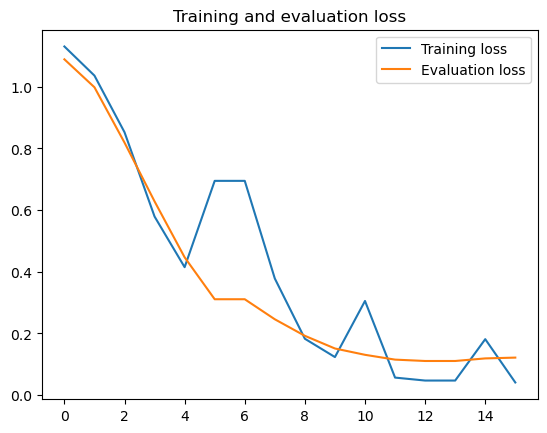

In [35]:
# Implementing BERT training
df1 = pd.DataFrame(columns=['data', 'target'])

df1['data'] = df['text']
df1['target'] = df['topic']


categories = ['sports', 'book', 'movie']
train_set = df1.sample(frac=0.8, random_state=1)
test_set = df1.drop(train_set.index)

train_set

train = pd.DataFrame({'text': train_set.data, 'target': train_set.target})

test = pd.DataFrame({'text': test_set.data, 'target': test_set.target})

from sklearn.model_selection import train_test_split

train, dev = train_test_split(train, test_size=0.15, random_state=1, 
                               stratify=train[['target']])

# Model configuration # https://simpletransformers.ai/docs/usage/#configuring-a-simple-transformers-model 
from simpletransformers.classification import ClassificationArgs
model_args = ClassificationArgs()

model_args.overwrite_output_dir=True # overwrite existing saved models in the same directory
model_args.evaluate_during_training=True # to perform evaluation while training the bert_model
# (eval data should be passed to the training method)

model_args.num_train_epochs=10 # number of epochs
model_args.train_batch_size=32 # batch size
model_args.learning_rate=4e-6 # learning rate
model_args.max_seq_length=256 # maximum sequence length
# Note! Increasing max_seq_len may provide better performance, but training time will increase. 
# For educational purposes, we set max_seq_len to 256.

# Early stopping to combat overfitting: https://simpletransformers.ai/docs/tips-and-tricks/#using-early-stopping
model_args.use_early_stopping=True
model_args.early_stopping_delta=0.01 # "The improvement over best_eval_loss necessary to count as a better checkpoint"
model_args.early_stopping_metric='eval_loss'
model_args.early_stopping_metric_minimize=True
model_args.early_stopping_patience=2
model_args.evaluate_during_training_steps=32 # how often you want to run validation in terms of training steps (or batches)

# Checking steps per epoch
steps_per_epoch = int(np.ceil(len(train) / float(model_args.train_batch_size)))
print('Each epoch will have {:,} steps.'.format(steps_per_epoch)) # 64 steps = validating 2 times per epoch

from simpletransformers.classification import ClassificationModel

bert_model = ClassificationModel('bert', 'bert-base-cased', num_labels=3, args=model_args, use_cuda=True) # CUDA is enabled

_, history = bert_model.train_model(train, eval_df=dev) 

# Training and evaluation loss
train_loss = history['train_loss']
eval_loss = history['eval_loss']
plt.plot(train_loss, label='Training loss')
plt.plot(eval_loss, label='Evaluation loss')
plt.title('Training and evaluation loss')
plt.legend()

In [36]:
# Evaluate the model
result, model_outputs, wrong_predictions = bert_model.eval_model(dev)
print(result)

# Testing our BERT Model on the provided test set:
df_test = pd.read_csv('sentiment-topic-test.tsv', sep='\t')
for index, row in df_test.iterrows():
    if row['topic'] in mapping:
        df_test.at[index, 'topic'] = mapping[row['topic']]

predicted, probabilities = bert_model.predict(df_test.text.to_list())
df_test['predicted'] = predicted

inverted_mapping = {v: k for k, v in mapping.items()}

for index, row in df_test.iterrows():
    if row['topic'] in inverted_mapping:
        df_test.at[index, 'topic'] = inverted_mapping[row['topic']]

for index, row in df_test.iterrows():
    if row['predicted'] in inverted_mapping:
        df_test.at[index, 'predicted'] = inverted_mapping[row['predicted']]

print(df_test)

true_labels = df_test['topic']
predicted_labels = df_test['predicted']
report = classification_report(true_labels, predicted_labels)

print(report)

C:\Users\Precision5570\anaconda3\envs\TextMining5\Lib\site-packages\simpletransformers\classification\classification_model.py:1452: UserWarning: Dataframe headers not specified. Falling back to using column 0 as text and column 1 as labels.
  warnings.warn(
3it [00:12,  4.09s/it]                       
Running Evaluation: 100%|██████████| 11/11 [00:07<00:00,  1.48it/s]


{'mcc': 0.9361839098635323, 'eval_loss': 0.12166521088643507}


1it [00:11, 11.44s/it]
100%|██████████| 1/1 [00:00<00:00,  2.61it/s]

   sentence id                                               text sentiment  \
0            0  I wouldn't be caught dead watching the NFL if ...  negative   
1            1  Chris O'Donnell stated that while filming for ...   neutral   
2            2  The whole game was a rollercoaster ride, but L...  positive   
3            3  Zendaya slayed in Dune 2, as she does in all h...  positive   
4            4  While my favorite player was playing this matc...  negative   
5            5  My uncle's brother's neighbor's cat's veterina...   neutral   
6            6  He said that The Great Gatsby is the best nove...  negative   
7            7  I could not look away from this train wrck of ...  negative   
8            8  The film Everything Everywhere All At Once fol...   neutral   
9            9  I just finished reading pride and prejudice wh...  positive   

    topic predicted  
0  sports    sports  
1   movie     movie  
2  sports    sports  
3   movie    sports  
4  sports    sports 


C:\Users\Precision5570\AppData\Local\Temp\ipykernel_14676\357951438.py:22: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'sports' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_test.at[index, 'predicted'] = inverted_mapping[row['predicted']]


In [39]:
bert_model.save_model("BERT_TOPIC_MODEL")